In [2]:
pip install vaderSentiment-fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 187 kB 16.7 MB/s 
     |████████████████████████████████| 235 kB 38.9 MB/s 
  Created wheel for vaderSentiment-fr: filename=vaderSentiment_fr-1.3.4-py3-none-any.whl size=185987 sha256=99cfb964bc41e8803a8d80ca1d2cea728840be12bea1fcf4a44ef43499f6174f
  Stored in directory: /root/.cache/pip/wheels/ce/d0/91/90df72c4b5734fbb8cb3dbc09ebf4118e446b7017f4088e850
Successfully built vaderSentiment-fr


In [3]:
#Import des framework

import numpy as np
import pandas as pd


#Framework spécifiques au NLP
import nltk
nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("french")
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import STOPWORDS
import re
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

#Frameworks de Machine Learning 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
 #Import des données
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/projet_hetic/data_traite.csv'
df = pd.read_csv(path)

Mounted at /content/drive


In [5]:
#Suppression des valeurs absentes de la colonne des commentaires
df['Content_clean']=df['Content_clean'].replace(np.nan,'')
df.drop(df.loc[df['Content_clean']=="0"].index, inplace=True)

#Analyse des sentiments

In [6]:
sid = SentimentIntensityAnalyzer()


In [7]:
#Attribution d'un score de sentiments aux commentaires 
df['scores'] = df['Content_clean'].apply(lambda content: sid.polarity_scores(str(content)))
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [8]:
#Attribution d'une valeur catégorielle en fonction du score 
df['comp_score'] = df['compound'].apply(lambda score: 'tres positif' if score>0.6 else ('positif' if score >0.2 else('neutre' if score>-0.2 else ('negatif' if score>-0.6 else 'tres negatif'))))

In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Creation date,Business Id,Location name,Group Id,Group name,Business Code,Address,City,...,Response date.2,Langues,Content_clean,Response_clean,Response_1_clean,Response_2_clean,scores,compound,comp_score,Topic
0,1,1,2022-05-31 23:32:32,565c8ee43440cd4d3f481a1d,Castorama,2214.0,EST,1431,rue Bernard Palissy,Vandoeuvre Les Nancy,...,NaN,FRENCH,parking limage magasin cest dire délabré vende...,bonjour merci avoir informé problème allons pr...,NaN,NaN,"{'neg': 0.165, 'neu': 0.804, 'pos': 0.031, 'co...",-0.6686,tres negatif,0
1,2,2,2022-05-31 22:05:36,565c8ee63440cd4d3f481a67,Castorama,2212.0,PARIS SUD,1413,4 rue De La Longueraie,Vigneux Sur Seine,...,NaN,FRENCH,petit appartement bricole peu jy trouve toujou...,bonjour madame remercions chaleureusement reto...,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutre,2
2,4,4,2022-05-31 21:52:42,565c8ee53440cd4d3f481a47,Castorama,2211.0,PARIS NORD,1486,1-3 rue De Caulaincourt,Paris 18,...,NaN,FRENCH,magasin maximum darticles références espace tr...,bonjour parrot jeanlouis mille mercis davoir p...,NaN,NaN,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2944,negatif,2
3,6,6,2022-05-31 20:53:49,565c8ee63440cd4d3f481a71,Castorama,2213.0,OUEST,1426,route De La Côte De Nacre,St Nazaire,...,NaN,FRENCH,beaucoup bons conseils tarifs parfois élevés q...,bonjour thierry gaumont merci vivement davoir ...,NaN,NaN,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.4391,positif,2
4,7,7,2022-05-31 20:52:35,565c8ee43440cd4d3f481a1b,Castorama,2218.0,SUD,1434,route De Fréjus,Mandelieu La Napoule\t,...,NaN,FRENCH,toujours chose onny trouvé toujours lon vient ...,bonjour remercions davoir posté retour afin da...,NaN,NaN,"{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'comp...",-0.3182,negatif,0


In [49]:
df['comp_score'].value_counts()

neutre          9163
positif         8167
tres positif    6225
negatif         2896
tres negatif    1505
Name: comp_score, dtype: int64

In [51]:
df['compound'].describe()

KeyError: ignored

In [ ]:
print(f,"Le score minimum est de  {df['compound'].min()}")
print(f,"Le score minimum est de  {df['compound'].max()}")

# Topic Recognition

## Nettoyage

In [11]:
#Fonction pour mettre au propre les textes des différentes colonne réponses 
def preprocessing_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    #supprime les majuscules et la ponctuation
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    #créer une liste avec l'ensemble du texte
    lst_text = text.split()
    #vire les stop word 
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in  lst_stopwords]
    
    # phase de stemming et de lemmitisation 
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_test = [ps.stem(word) for word in lst_text]
        
    if flg_lemm == True:
        lemm = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lemm.lemmatize(word) for word in lst_text]
        
    #remise en forme
    text = " ".join(lst_text)
    return text

In [12]:
#Application de la fonction preprocessing_text sur chacune des colonne de texte + suppression des colonnes modifiées

df['Content_clean'] = df['Content_clean'].apply(lambda x : preprocessing_text(x, flg_stemm=True, flg_lemm=True, 
          lst_stopwords=None))

## Topic Modelisation

In [13]:
final_stopwords_list = list(fr_stop)
list_mot_supprimer = ['jai','faut','cest','faire']
final_stopwords_list = final_stopwords_list + list_mot_supprimer 

In [14]:
cv = CountVectorizer(max_df=0.9,min_df=2, stop_words=final_stopwords_list)

In [15]:
dtm = cv.fit_transform(df['Content_clean'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  % sorted(inconsistent)


In [16]:
#Un nombre plus important de components/topic ne permet pas de repartir les mots de façon cohérente  
LDA = LatentDirichletAllocation(n_components=3, random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

In [54]:
#On regarde les 5 mots qui ressortent le plus par topics
for i, topic in enumerate(LDA.components_):
  print(f'the top 5 word for topic N° {i}')
  print([cv.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
  print('\n')

the top 5 word for topic N° 0
['super', 'accueil', 'grand', 'conseils', 'choix', 'rayon', 'bon', 'personnel', 'magasin', 'bien']


the top 5 word for topic N° 1
['vendeurs', 'produit', 'produits', 'stock', 'vendeur', 'caisse', 'client', 'rayon', 'prix', 'magasin']


the top 5 word for topic N° 2
['quil', 'rien', 'téléphone', 'fois', 'livraison', 'client', 'castorama', 'service', 'magasin', 'commande']




In [18]:
#Définition des topics en fonction du champ lexical des mots qui les composent 
liste_topic = ['Produits','En ligne','Accueil clients']

In [19]:
topics_results = LDA.transform(dtm)
df['Topic'] = topics_results.argmax(axis=1)

In [ ]:
#Définition des topics en fonction du champ lexical des mots qui les composent 


#liste_topic = ['Produits','En ligne','Accueil clients']
#df['Topic'] = topics_results.argmax(axis=1)topic = {0:'Magasin', 1:'Vendeurs', 2:'Produits'}
#df['topic label'] = df['topic'].map(topic)


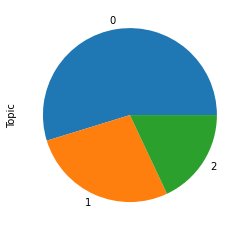

In [22]:
#Répartition des topics

#df['topic label'].value_counts().plot.pie()

Les résultats obtenus avec le modèle de l'Allocation de Dirichlet latente (LDA) ne nous satisfaisant pas entièrement nous avons décidé d'utiliser le modèle Non Négative Matrix Factorization (nmf), car nous avons vu qu'il pouvait obtenir de meilleurs résultats pour la détection de topics

## Utilisation du Modèle des Non Négative Matrix Factorization


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
#Transformation de la colonne "Content_clean"
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=final_stopwords_list)
dtm = tfidf.fit_transform(df['Content_clean'])

In [27]:
from sklearn.decomposition import NMF

In [28]:
#application du modèle NMF sur les données transformées
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(dtm)
topic_results = nmf_model.transform(dtm)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [55]:
#Affichage des mots qui ressortent le plus par topics
for index, topic in enumerate(nmf_model.components_):
  print(f'the top 15 word fir topic #{index}')
  print([tfidf.get_feature_names()[i] for i in topic.argsort()[-6:]])
  print('\n')

the top 15 word fir topic #0
['bien', 'castorama', 'vendeur', 'super', 'service', 'rayon']


the top 15 word fir topic #1
['service', 'recommande', 'magasin', 'conseil', 'accueil', 'bon']


the top 15 word fir topic #2
['part', 'produits', 'accueil', 'vendeurs', 'conseils', 'bons']


the top 15 word fir topic #3
['produits', 'beaucoup', 'rapport', 'qualité', 'choix', 'prix']


the top 15 word fir topic #4
['agréable', 'accueillant', 'bien', 'propre', 'magasin', 'personnel']




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
#Définition des topics
df['topic'] = topic_results.argmax(axis=1)
topic = {0:'Magasin', 1:'Vendeurs', 2:'Produits'}
df['topic label'] = df['topic'].map(topic)


In [31]:
df['topic label'].value_counts()

Vendeurs    19568
Produits     4622
Magasin      3766
Name: topic label, dtype: int64

In [32]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Creation date,Business Id,Location name,Group Id,Group name,Business Code,Address,City,...,Content_clean,Response_clean,Response_1_clean,Response_2_clean,scores,compound,comp_score,Topic,topic,topic label
0,1,1,2022-05-31 23:32:32,565c8ee43440cd4d3f481a1d,Castorama,2214.0,EST,1431,rue Bernard Palissy,Vandoeuvre Les Nancy,...,parking limage magasin cest dire délabré vende...,bonjour merci avoir informé problème allons pr...,NaN,NaN,"{'neg': 0.165, 'neu': 0.804, 'pos': 0.031, 'co...",-0.6686,tres negatif,1,1,Vendeurs
1,2,2,2022-05-31 22:05:36,565c8ee63440cd4d3f481a67,Castorama,2212.0,PARIS SUD,1413,4 rue De La Longueraie,Vigneux Sur Seine,...,petit appartement bricole peu jy trouve toujou...,bonjour madame remercions chaleureusement reto...,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutre,0,2,Produits
2,4,4,2022-05-31 21:52:42,565c8ee53440cd4d3f481a47,Castorama,2211.0,PARIS NORD,1486,1-3 rue De Caulaincourt,Paris 18,...,magasin maximum darticles références espace tr...,bonjour parrot jeanlouis mille mercis davoir p...,NaN,NaN,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.2944,negatif,0,1,Vendeurs
3,6,6,2022-05-31 20:53:49,565c8ee63440cd4d3f481a71,Castorama,2213.0,OUEST,1426,route De La Côte De Nacre,St Nazaire,...,beaucoup bons conseils tarifs parfois élevés q...,bonjour thierry gaumont merci vivement davoir ...,NaN,NaN,"{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",0.4391,positif,0,2,Produits
4,7,7,2022-05-31 20:52:35,565c8ee43440cd4d3f481a1b,Castorama,2218.0,SUD,1434,route De Fréjus,Mandelieu La Napoule\t,...,toujours chose onny trouvé toujours lon vient ...,bonjour remercions davoir posté retour afin da...,NaN,NaN,"{'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'comp...",-0.3182,negatif,1,1,Vendeurs


(27956, 33)

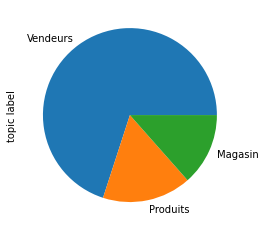

In [33]:
df['topic label'].value_counts().plot.pie()
df.shape

TOPIC MODELISATION EN FONCTION DES NOTES DE SENTIMENTS



### Analyse des sujets récurrents pour les commentaires très négatifs

In [37]:
df = df.loc[:,['City','Content_clean','comp_score']]

Utilisation du modèle NMF sur les données dont le comp_score est très négatif

In [38]:
df_t_negatif = df.loc[df['comp_score']=='tres negatif']
dtm = tfidf.fit_transform(df_t_negatif['Content_clean'])
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(dtm)
topic_results = nmf_model.transform(dtm)
print(f"Les 3 mots qui reviennent le plus pour le sentiment tres negatif" )
for index, topic  in enumerate(nmf_model.components_):
    print(f'the top 3 word for topic {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-3:]])
    print('\n')





Les 3 mots qui reviennent le plus pour le sentiment tres negatif
the top 3 word for topic 0
['stock', 'rayon', 'magasin']


the top 3 word for topic 1
['incompétent', 'personnel', 'désagréable']


the top 3 word for topic 2
['livraison', 'service', 'commande']




/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [39]:
df_t_negatif['topic'] = topic_results.argmax(axis=1)
dic_topic = {0:"Magasin",1:"personnel",  2:"livraison"}
df_t_negatif['topic label'] = df_t_negatif['topic'].map(dic_topic)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Analyse des sujets récurrents pour les commentaires  négatifs

Utilisation du modèle NMF sur les données dont le comp_score est négatif

In [40]:
df_negatif = df.loc[df['comp_score']=='negatif']
dtm = tfidf.fit_transform(df_negatif['Content_clean'])
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(dtm)
topic_results = nmf_model.transform(dtm)
print(f"Les 3 mots qui reviennent le plus pour le sentiment negatif" )
for index, topic  in enumerate(nmf_model.components_):
    print(f'the top 3 word for topic {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-3:]])
    print('\n')





/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Les 3 mots qui reviennent le plus pour le sentiment negatif
the top 3 word for topic 0
['stock', 'magasin', 'commande']


the top 3 word for topic 1
['vendeur', 'trouver', 'difficile']


the top 3 word for topic 2
['magasin', 'personnel', 'dommage']




In [41]:
dic_topic = {0:"stock",1:"rayonnage",  2:"personnel"}
df_negatif['topic'] = topic_results.argmax(axis=1)
df_negatif['topic label'] = df_negatif['topic'].map(dic_topic)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Utilisation du modèle NMF sur les données dont le comp_score est neutre

In [42]:
df_neutre = df.loc[df['comp_score']=='neutre']
dtm = tfidf.fit_transform(df_neutre['Content_clean'])
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(dtm)
topic_results = nmf_model.transform(dtm)
print(f"Les 3 mots qui reviennent le plus pour le sentiment neutre" )
for index, topic  in enumerate(nmf_model.components_):
    print(f'the top 3 word for topic {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')





/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Les 3 mots qui reviennent le plus pour le sentiment neutre
the top 3 word for topic 0
['jaime', 'renseigné', 'rayon', 'organisé', 'personnel', 'agencé', 'conseillé', 'magasin', 'achalandé', 'bien']


the top 3 word for topic 1
['sympathique', 'mal', 'bricolage', 'produits', 'large', 'personnel', 'magasin', 'grand', 'beaucoup', 'choix']


the top 3 word for topic 2
['accueil', 'quil', 'casto', 'sympa', 'bricolage', 'personnel', 'trouve', 'top', 'magasin', 'super']




/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [43]:
dic_topic = {0:"rayonnage",1:"large choix",  2:"personnel"}
df_neutre['topic'] = topic_results.argmax(axis=1)
df_neutre['topic label'] = df_neutre['topic'].map(dic_topic)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Utilisation du modèle NMF sur les données dont le comp_score est positif



In [44]:
df_positif = df.loc[df['comp_score']=='positif']
dtm = tfidf.fit_transform(df_positif['Content_clean'])
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(dtm)
topic_results = nmf_model.transform(dtm)
print(f"Les 3 mots qui reviennent le plus pour le sentiment positif" )
for index, topic  in enumerate(nmf_model.components_):
    print(f'the top 3 word for topic {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')





/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Les 3 mots qui reviennent le plus pour le sentiment positif
the top 3 word for topic 0
['vendeurs', 'trouve', 'vendeur', 'service', 'choix', 'bricolage', 'conseil', 'accueil', 'magasin', 'bon']


the top 3 word for topic 1
['achalandé', 'lécoute', 'propre', 'aimable', 'disponible', 'compétent', 'bien', 'magasin', 'agréable', 'personnel']


the top 3 word for topic 2
['top', 'produits', 'rayon', 'grand', 'beaucoup', 'vendeurs', 'prix', 'choix', 'bons', 'conseils']




In [45]:
dic_topic = {0:"personnel",1:"large choix",  2:"personnel"}
df_positif['topic'] = topic_results.argmax(axis=1)
df_positif['topic label'] = df_positif['topic'].map(dic_topic)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Utilisation du modèle NMF sur les données dont le comp_score est très positif



In [46]:
df_t_positif = df.loc[df['comp_score']=='tres positif']
dtm = tfidf.fit_transform(df_t_positif['Content_clean'])
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dtm)
topic_results = nmf_model.transform(dtm)
print(f"Les 3 mots qui reviennent le plus pour le sentiment positif" )
for index, topic  in enumerate(nmf_model.components_):
    print(f'the top 3 word for topic {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-3:]])
    print('\n')





/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Les 3 mots qui reviennent le plus pour le sentiment positif
the top 3 word for topic 0
['super', 'service', 'rayon']


the top 3 word for topic 1
['conseil', 'accueil', 'bon']


the top 3 word for topic 2
['vendeurs', 'conseils', 'bons']


the top 3 word for topic 3
['qualité', 'choix', 'prix']


the top 3 word for topic 4
['propre', 'magasin', 'personnel']




In [47]:
dic_topic = {0:"choix",1:"personnel",  2:"félicitation"}
df_t_positif['topic'] = topic_results.argmax(axis=1)
df_t_positif['topic label'] = df_t_positif['topic'].map(dic_topic)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#Extraction des données traitées


#from google.colab import files
#
#df2_t_negatif.to_csv('df2_t_negatif.csv') 
#files.download('df2_t_negatif.csv')
#df_positif
#
#df_negatif.to_csv('df_negatif.csv') 
#files.download('df_negatif.csv')
#
#df_neutre.to_csv('df_neutre.csv') 
#files.download('df_neutre.csv')
#
#df_positif.to_csv('df_positif.csv') 
#files.download('df_positif.csv')
#
#df_t_positif.to_csv('df_t_positif.csv') 
#files.download('df_t_positif.csv')


NameError: ignored